### Initial Exploration: Listing Keys in All Raw Data Files

**Purpose:**
This script performs a preliminary check on all the `.mat` files downloaded into the `../data/raw/` directory. Its main goal is to list the internal "keys" available within each file. These keys are essential for knowing how to access the actual data arrays (like vibration signals, RPM, etc.) stored inside each `.mat` file.

**Inputs:**
* All `.mat` files present in the `../data/raw/` directory.

**Operations:**
1.  **Lists Files:** Uses `os.listdir()` to get a list of all filenames in the specified raw data directory.
2.  **Iterates Through Files:** Loops through each filename found.
3.  **Loads `.mat` File:** For each file, it constructs the full path and uses `scipy.io.loadmat()` to load its content.
4.  **Prints Keys:** After successfully loading a file, it prints:
    * The name of the file being processed.
    * A confirmation that the file was loaded.
    * The dictionary keys available within that `.mat` file (e.g., `__header__`, `__version__`, `__globals__`, and importantly, data keys like `X097_DE_time`, `X097RPM`, etc.).
5.  **Separates Output:** Prints a "=======================" line to visually separate the information for each file.

**Output & Interpretation:**
* The script produces a printed list, one section for each `.mat` file in the `../data/raw/` directory.
* Each section shows the filename and then lists all the internal variable names (keys) that can be used to access data within that file.
* **Key Insight:** This output is crucial for identifying the correct keys for Drive-End (`_DE_time`), Fan-End (`_FE_time`), Base Accelerometer (`_BA_time`), and RPM (`RPM`) data for each specific experiment file. This information is then used in subsequent scripts to extract the precise data needed for analysis and visualization. For example, it helps confirm that `Normal_0.mat` might contain a key like `X097_DE_time` for its drive-end vibration data.
* This step is a foundational part of data understanding, ensuring that we know how to correctly access the specific measurements from the dataset.

In [5]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to one of your data files
# This path is relative to where your notebook is (in the 'notebooks' folder)
files_path = '../data/raw'
files = os.listdir(files_path)
for file in files:
    print(f"Information for file: {file}")
    file_path = os.path.join(files_path, file)
    mat_data = scipy.io.loadmat(file_path)
    print(f"Successfully loaded: {file_path}")
    print("Keys in the .mat file:", mat_data.keys())
    print("=======================")

Information for file: B007_0.mat
Successfully loaded: ../data/raw\B007_0.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM'])
Information for file: B007_1.mat
Successfully loaded: ../data/raw\B007_1.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X119_DE_time', 'X119_FE_time', 'X119_BA_time', 'X119RPM'])
Information for file: B007_2.mat
Successfully loaded: ../data/raw\B007_2.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X120_DE_time', 'X120_FE_time', 'X120_BA_time', 'X120RPM'])
Information for file: IR007_0.mat
Successfully loaded: ../data/raw\IR007_0.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])
Information for file: IR007_1.mat
Successfully loaded: ../data/raw\IR007_1.mat
Keys in the .mat file: dict_keys(['__header__', '__version_

### Analysis of a Single Bearing Signal File

**Purpose:**
This script is designed for initial inspection and visualization of a single raw vibration signal from a CWRU bearing `.mat` file. Its goal is to help understand the basic characteristics of the signal and to visually check for any obvious patterns or anomalies at different points in the recording.

**Inputs:**
* `file_name`: The name of the `.mat` file to be analyzed (e.g., `'Normal_0.mat'`). This file should be located in the `../data/raw/` directory.
* `signal_key_for_file`: The specific key within the `.mat` file that contains the Drive-End (DE) time-series vibration data (e.g., `'X097_DE_time'`).

**Operations:**
1.  **Loads Data:** Uses `scipy.io.loadmat` to load the specified `.mat` file.
2.  **Extracts Signal:** Accesses the vibration data array using the provided `signal_key_for_file` and flattens it into a 1D NumPy array.
3.  **Prints Metadata:** Displays basic information about the loaded signal, including its total length (number of samples), data type, and the first and last 10 sample values.
4.  **Visualizes Segments:** Generates three separate plots using `matplotlib.pyplot`:
    * A segment from the **start** of the signal.
    * A segment from the **middle** of the signal.
    * A segment from the **end** of the signal.
    The number of samples in each plotted segment is controlled by the `samples_to_plot` variable.

**Output & Interpretation:**
* The script prints confirmation of file loading and signal properties.
* It displays three line plots. Each plot shows the amplitude of the vibration signal over the sample index for the respective segment (start, middle, end).
* These plots allow for a visual assessment of:
    * The general waveform and amplitude range of the signal.
    * Any noticeable repetitive patterns, spikes, or transients.
    * Whether the signal characteristics appear consistent or change significantly across the duration of the recording.
* This initial visual check is useful for verifying data integrity and getting a first feel for what a "normal" or a specific "faulty" signal looks like before more complex processing.

Successfully loaded: Normal_0.mat
Using signal key: X097_DE_time
Signal length: 243938 samples
Signal data type: float64
First 10 samples: [ 0.05319692  0.08866154  0.09971815  0.05862092 -0.00458954 -0.056952
 -0.07176369 -0.05862092 -0.04652123 -0.04985908]
Last 10 samples: [ 0.07468431  0.10013538  0.09325108  0.046104   -0.01919262 -0.059664
 -0.06383631 -0.03463015  0.01668923  0.04693846]


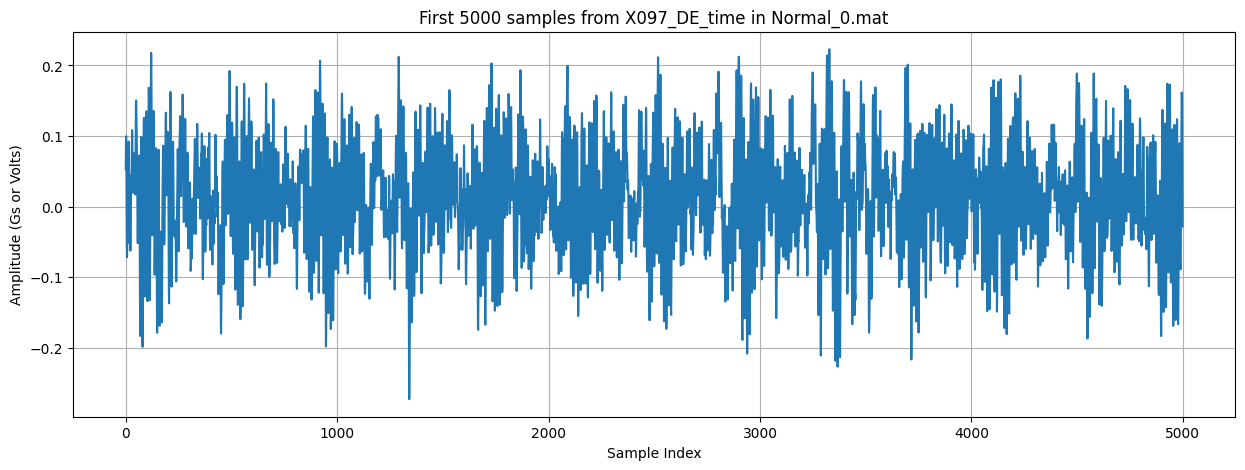

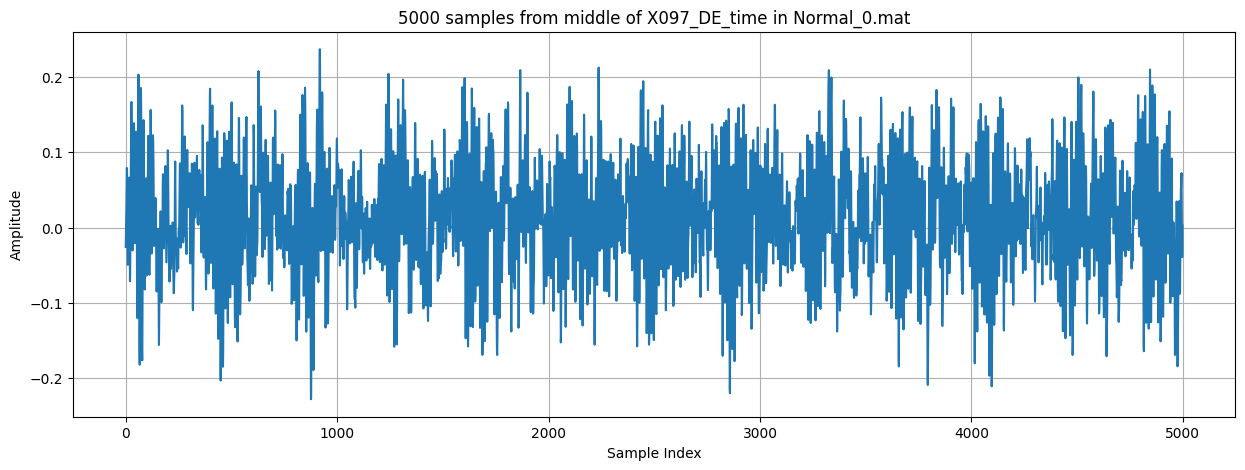

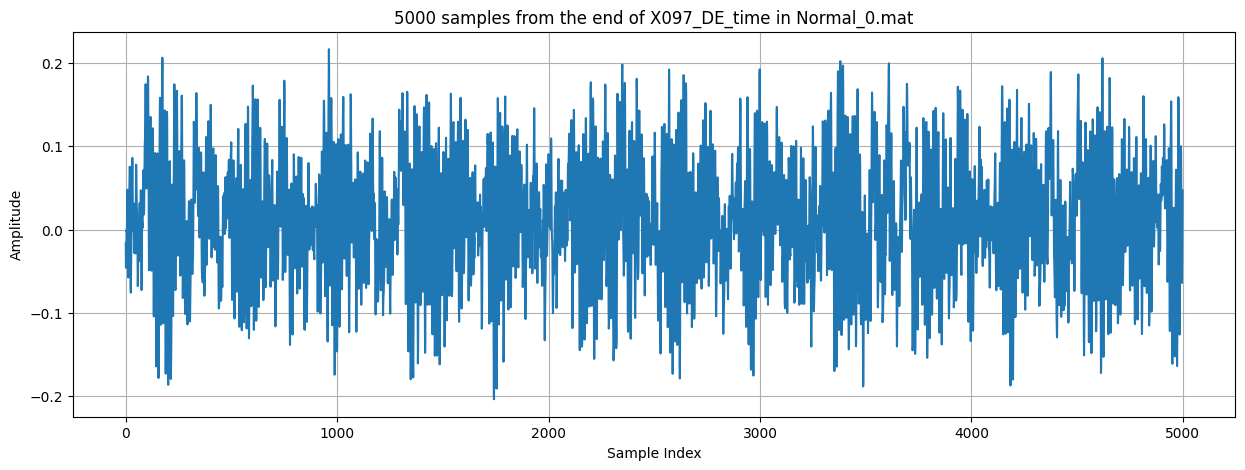

In [29]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the specific file and its known DE_time key
file_name = 'Normal_0.mat'
# From the output, the key for Normal_0.mat (97.mat) is X097_DE_time
# If you were loading B007_0.mat, the key would be 'X118_DE_time'
signal_key_for_file = 'X097_DE_time'

file_path = os.path.join('../data/raw', file_name)

try:
    mat_data = scipy.io.loadmat(file_path)
    print(f"Successfully loaded: {file_name}")
    
    # Check if the specific key exists
    if signal_key_for_file in mat_data:
        print(f"Using signal key: {signal_key_for_file}")
        # Extract the vibration signal and flatten it to a 1D array
        vibration_signal = mat_data[signal_key_for_file].flatten()
        
        print(f"Signal length: {len(vibration_signal)} samples")
        print(f"Signal data type: {vibration_signal.dtype}")
        print(f"First 10 samples: {vibration_signal[:10]}")
        print(f"Last 10 samples: {vibration_signal[-10:]}") # Good to check the end too

        # Plot the first N samples (e.g., 5000 or one full rotation if known)
        # CWRU data is often sampled at 12kHz. If motor speed is ~1797 RPM (Normal_0 data):
        # Samples per revolution = (12000 samples/sec) * (60 sec/min) / (1797 rev/min) ~= 400 samples/rev
        samples_to_plot = 5000 # You can adjust this
        
        plt.figure(figsize=(15, 5))
        plt.plot(vibration_signal[:samples_to_plot])
        plt.title(f"First {samples_to_plot} samples from {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude (Gs or Volts)") # Check CWRU docs for units if needed
        plt.grid(True)
        plt.show()

        # plot a segment from the middle
        plt.figure(figsize=(15, 5))
        middle_point = len(vibration_signal) // 2
        plt.plot(vibration_signal[middle_point : middle_point + samples_to_plot])
        plt.title(f"{samples_to_plot} samples from middle of {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

        # plot a segment from the end
        plt.figure(figsize=(15, 5))
        plt.plot(vibration_signal[-samples_to_plot:])
        plt.title(f"{samples_to_plot} samples from the end of {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()
        
    else:
        print(f"Error: Key '{signal_key_for_file}' not found in {file_name}.")
        print(f"Available keys are: {mat_data.keys()}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


### Comprehensive Visualization of Bearing Signals Across Loads and Conditions

**Purpose:**
This script provides a compact and comprehensive visualization of vibration signals from the CWRU bearing dataset. It aims to compare different bearing health states (Normal, Inner Race Fault, Ball Fault, Outer Race Fault) across various operating (motor load) conditions by displaying key segments of their signals in a structured way.

**Inputs:**
* Pre-defined lists (`signals_to_compare_0HP`, `_1HP`, `_2HP`) specifying:
    * The `.mat` **filenames** for each bearing state and load condition.
    * The **signal keys** (e.g., `'X097_DE_time'`) to extract Drive-End vibration data.
    * The **RPM keys** (e.g., `'X097RPM'`) to extract motor speed, with fallbacks to estimated RPMs.
    * Descriptive **labels** for each signal.
* All specified `.mat` files are expected to be in the `../data/raw/` directory.
* `SAMPLING_RATE`: The sampling frequency of the data (e.g., 12000 Hz).

**Operations:**
1.  **Data Definition:** Organizes file information for 0 HP, 1 HP, and 2 HP load conditions.
2.  **Signal Loading:**
    * Iterates through each defined load condition (0HP, 1HP, 2HP).
    * For each load, it attempts to load the raw vibration signal and RPM for all four bearing states (Normal, IRF, BF, ORF) using a helper function (`load_signal_and_rpm`).
    * Calculates `samples_per_rev` (samples per revolution) for each signal dynamically based on its loaded RPM and the `SAMPLING_RATE`. This aims to display approximately one revolution of the shaft in the plots.
3.  **Plot Generation (`create_compact_load_comparison_figure` function):**
    * For each load condition (if all its four signals are successfully loaded), this function generates **one single figure**.
    * This figure contains a **3x4 grid of subplots** (12 subplots in total):
        * **Rows (3):** Represent signal segments from the "Start", "Middle", and "End" of the recording.
        * **Columns (4):** Represent the four bearing health states (Normal, Inner Race Fault, Ball Fault, Outer Race Fault).
    * **Y-axis Scaling:** For each row of subplots (e.g., all "Start" segments), common Y-axis limits are calculated and applied to facilitate direct visual comparison of amplitudes across different bearing states for that segment type.
    * **Titles & Labels:** The main figure is titled by the load condition (e.g., "0 HP Load"). Subplot titles (on the top row) indicate the bearing state and filename. Y-labels (on the left column) indicate the segment type ("Start", "Middle", "End").
4.  **Output:** The script generates three large figures in total, one for each HP load condition (0HP, 1HP, 2HP). Each figure provides a side-by-side view of approximately one revolution of the vibration signal from the start, middle, and end for all four bearing types under that specific load.

**Output & Interpretation:**
* The script prints progress messages during data loading and plot generation.
* The three output figures allow for a detailed visual comparison:
    * **Across Bearing States:** Within each row of a figure, one can compare how a Normal signal looks versus different fault types at the same load and same part of the recording (e.g., all "Start" segments for 0HP).
    * **Across Signal Segments:** Within each column of a figure, one can observe if a specific bearing state's signal (e.g., Inner Race Fault at 0HP) changes characteristics from its start, to middle, to end.
    * **Across Load Conditions:** By comparing the three separate figures (0HP, 1HP, 2HP), one can assess how motor load influences the vibration signatures for each bearing state and fault type.
* This comprehensive visualization is a key part of Exploratory Data Analysis (EDA), helping to identify patterns, anomalies, and the general nature of the fault signatures before moving to quantitative analysis and model building.

--- Starting Compact Comprehensive Plot Generation ---

--- Processing: 0 HP Load ---
Successfully loaded and processed: Normal_0.mat (RPM: 1796, Samples/Rev: 400)
Successfully loaded and processed: IR007_0.mat (RPM: 1797, Samples/Rev: 400)
Successfully loaded and processed: B007_0.mat (RPM: 1796, Samples/Rev: 400)
Successfully loaded and processed: OR007@6_0.mat (RPM: 1796, Samples/Rev: 400)


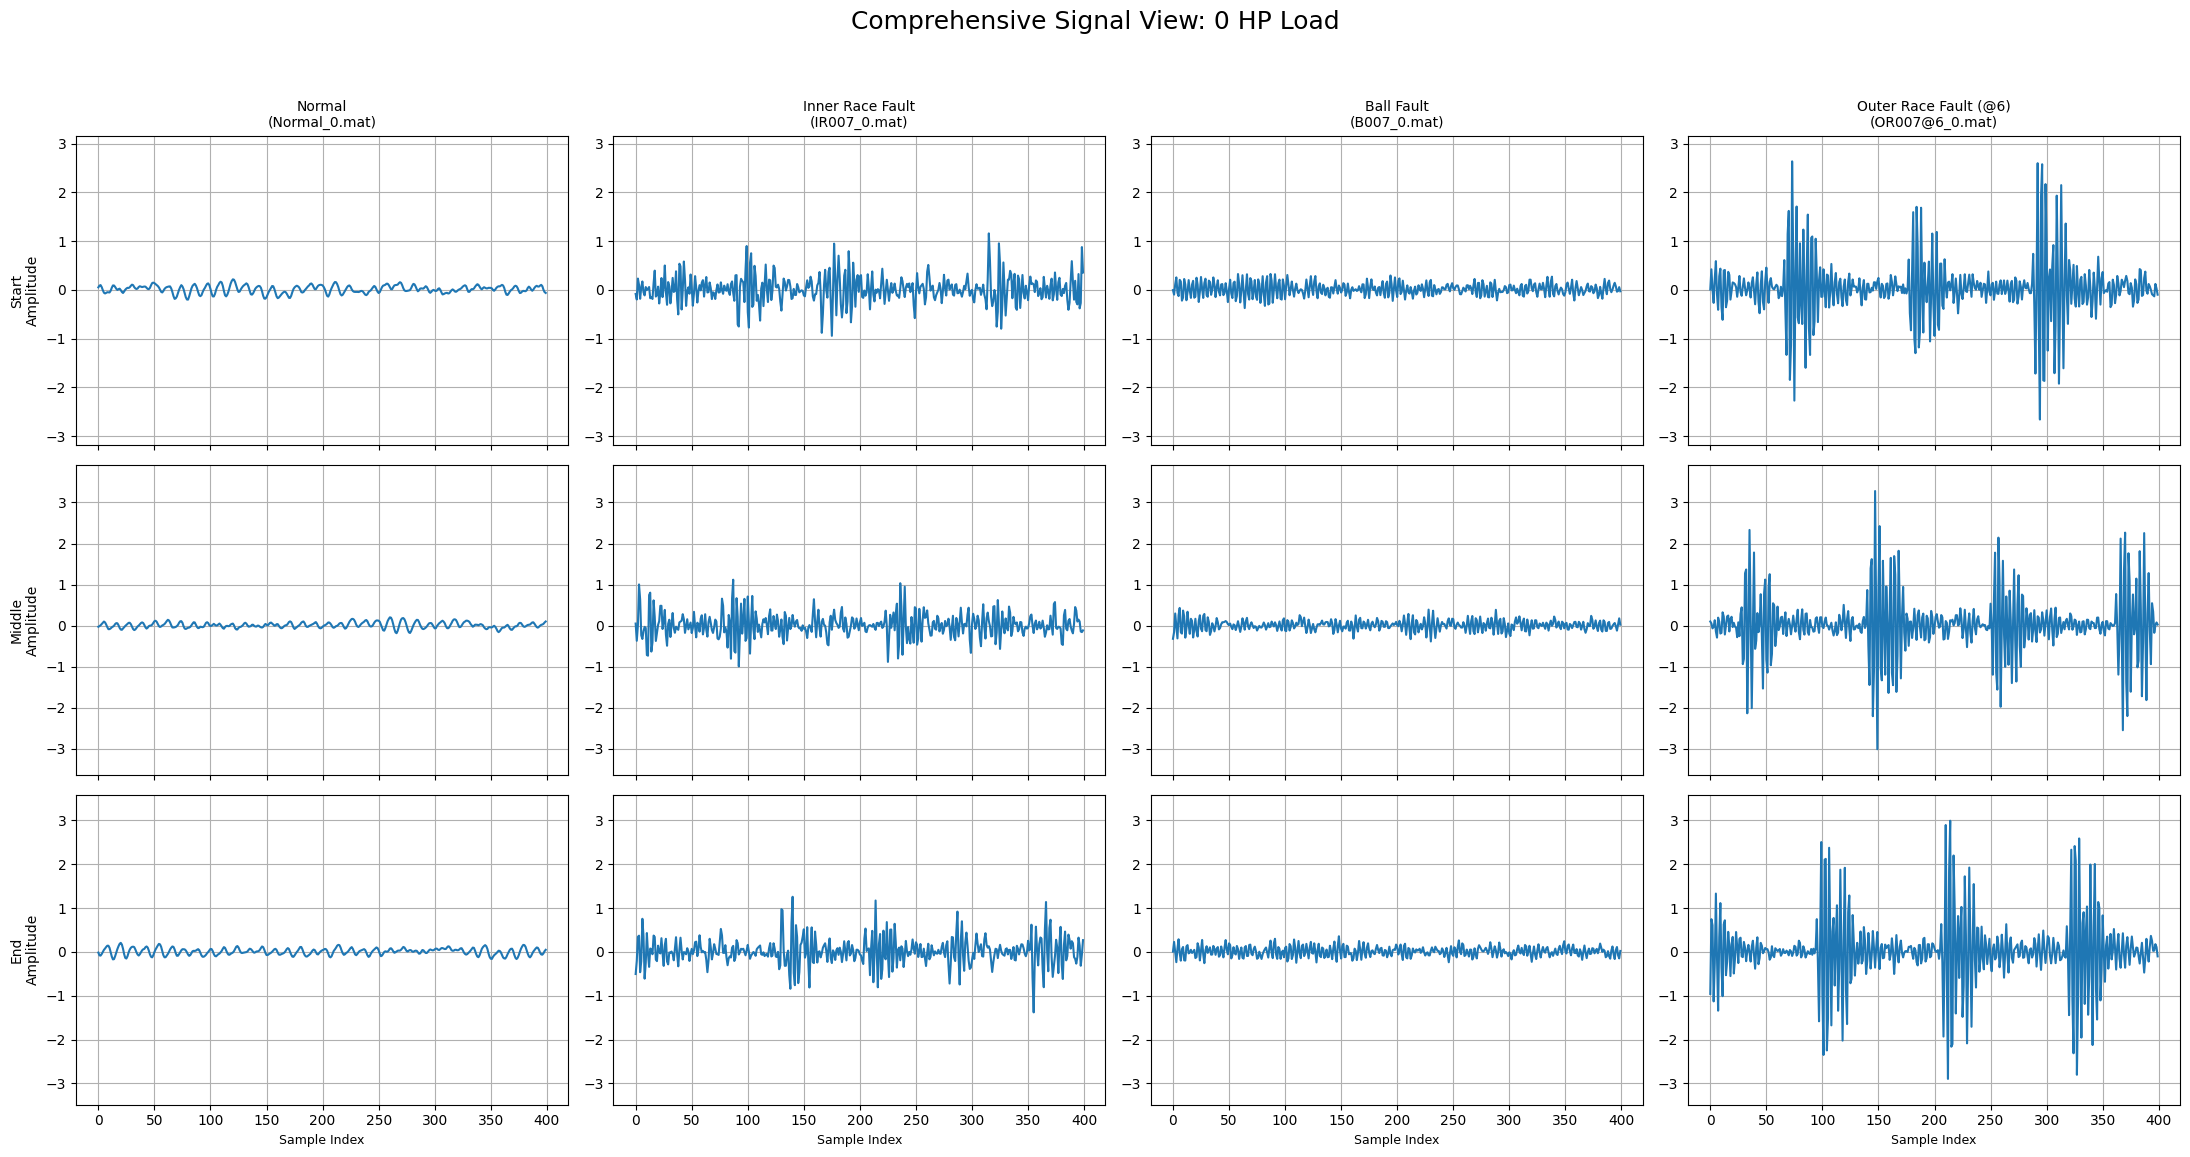

--- Finished compact plot for 0 HP Load ---

--- Processing: 1 HP Load ---
Successfully loaded and processed: Normal_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: IR007_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: B007_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: OR007@6_1.mat (RPM: 1773, Samples/Rev: 406)


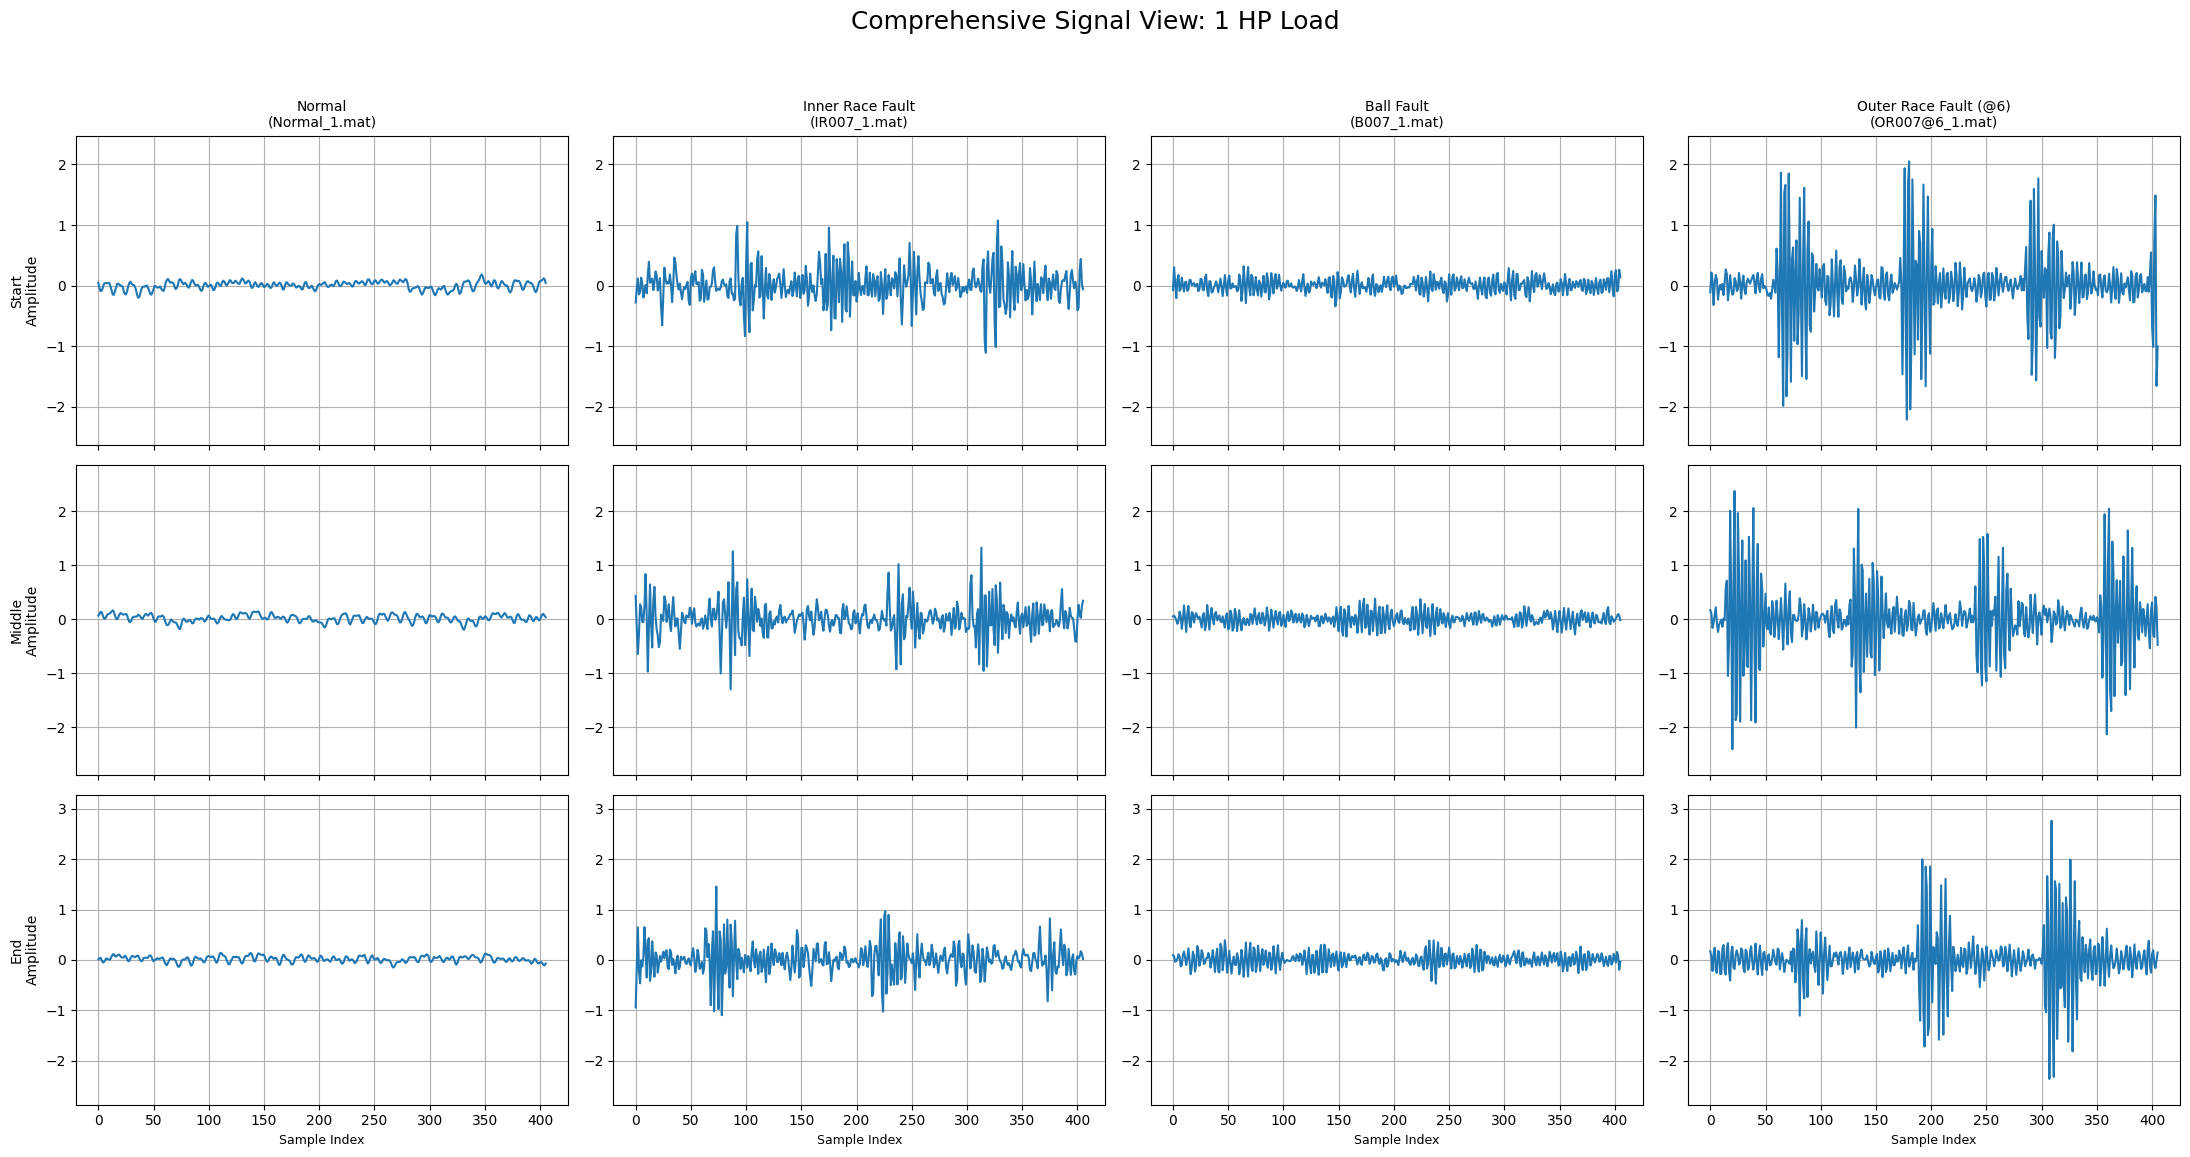

--- Finished compact plot for 1 HP Load ---

--- Processing: 2 HP Load ---
Successfully loaded and processed: Normal_2.mat (RPM: 1750, Samples/Rev: 411)
Successfully loaded and processed: IR007_2.mat (RPM: 1748, Samples/Rev: 411)
Successfully loaded and processed: B007_2.mat (RPM: 1748, Samples/Rev: 411)
Successfully loaded and processed: OR007@6_2.mat (RPM: 1750, Samples/Rev: 411)


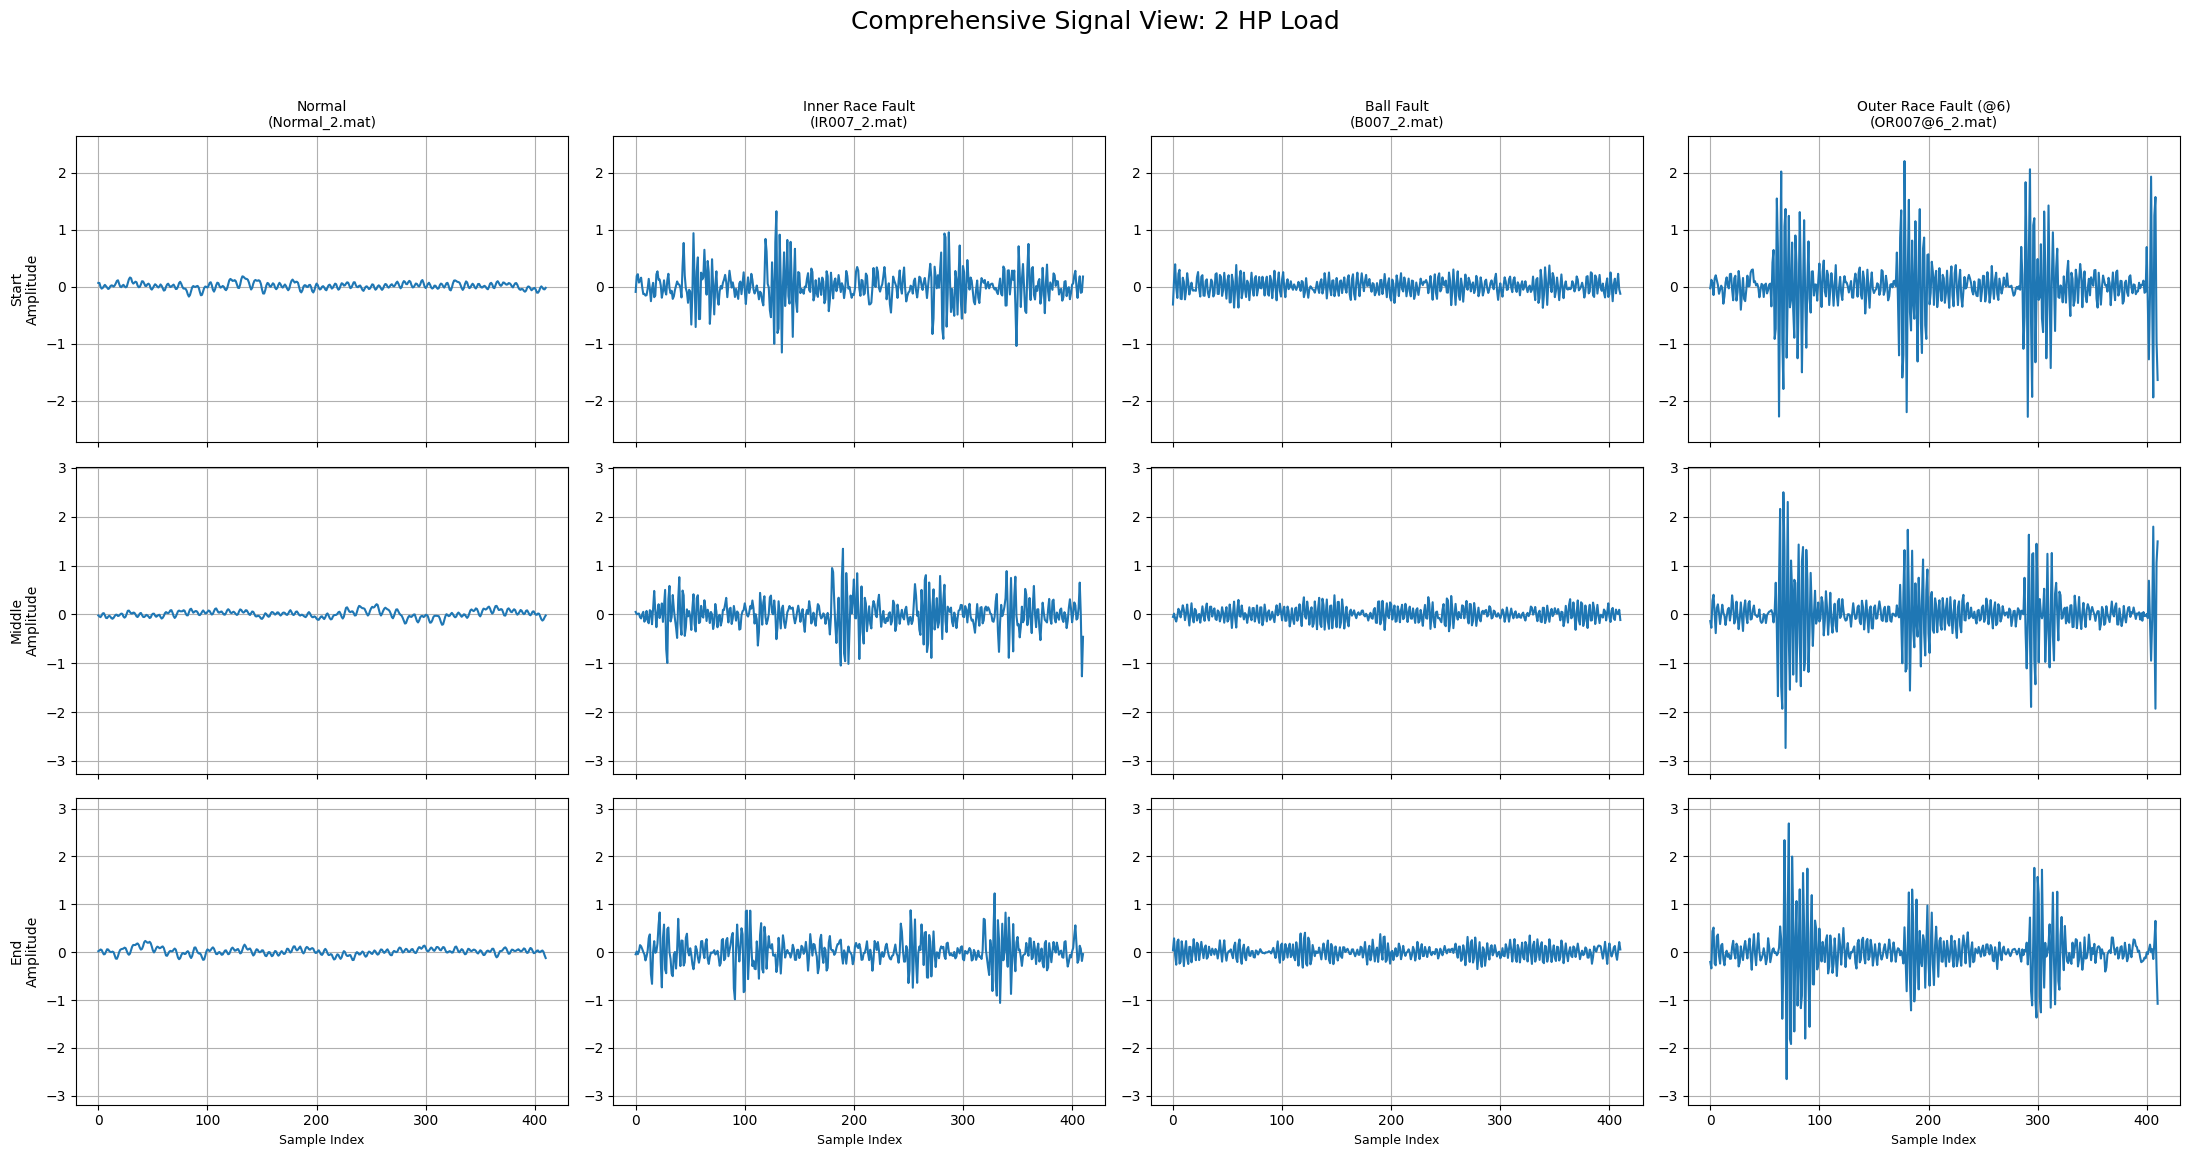

--- Finished compact plot for 2 HP Load ---

--- Compact Comprehensive Plot Generation Complete ---


In [34]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Overall Configuration ---
SAMPLING_RATE = 12000 # Samples per second for 12k CWRU data

# --- Data Definitions for each Load Condition (same as before) ---
signals_to_compare_0HP = [
    {'file_name': 'Normal_0.mat', 'signal_key': 'X097_DE_time', 'rpm_key': 'X097RPM', 'label': 'Normal'},
    {'file_name': 'IR007_0.mat',  'signal_key': 'X105_DE_time', 'rpm_key': 'X105RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_0.mat',   'signal_key': 'X118_DE_time', 'rpm_key': 'X118RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_0.mat','signal_key': 'X130_DE_time', 'rpm_key': 'X130RPM', 'label': 'Outer Race Fault (@6)'}
]
signals_to_compare_1HP = [
    {'file_name': 'Normal_1.mat', 'signal_key': 'X098_DE_time', 'rpm_key': 'X098RPM', 'label': 'Normal'},
    {'file_name': 'IR007_1.mat',  'signal_key': 'X106_DE_time', 'rpm_key': 'X106RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_1.mat',   'signal_key': 'X119_DE_time', 'rpm_key': 'X119RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_1.mat','signal_key': 'X131_DE_time', 'rpm_key': 'X131RPM', 'label': 'Outer Race Fault (@6)'}
]
signals_to_compare_2HP = [
    {'file_name': 'Normal_2.mat', 'signal_key': 'X099_DE_time', 'rpm_key': 'X099RPM', 'label': 'Normal'},
    {'file_name': 'IR007_2.mat',  'signal_key': 'X107_DE_time', 'rpm_key': 'X107RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_2.mat',   'signal_key': 'X120_DE_time', 'rpm_key': 'X120RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_2.mat','signal_key': 'X132_DE_time', 'rpm_key': 'X132RPM', 'label': 'Outer Race Fault (@6)'}
]

all_load_conditions_data = [
    {'load_label': "0 HP Load", 'data_list': signals_to_compare_0HP, 'estimated_rpm': 1797},
    {'load_label': "1 HP Load", 'data_list': signals_to_compare_1HP, 'estimated_rpm': 1772},
    {'load_label': "2 HP Load", 'data_list': signals_to_compare_2HP, 'estimated_rpm': 1750}
]

# --- Helper function to load data and RPM (same as before) ---
def load_signal_and_rpm(file_name, signal_key, rpm_key, estimated_rpm_fallback):
    file_path_full = os.path.join('../data/raw', file_name)
    signal_data = None
    rpm_value = None
    try:
        mat_data = scipy.io.loadmat(file_path_full)
        if signal_key in mat_data:
            signal_data = mat_data[signal_key].flatten()
        else:
            print(f"ERROR: Key '{signal_key}' not found in {file_name}. Available keys: {mat_data.keys()}")

        if rpm_key in mat_data:
            rpm_value = mat_data[rpm_key].flatten()[0]
        else:
            rpm_value = estimated_rpm_fallback
            # print(f"Warning: RPM key '{rpm_key}' not found in {file_name}. Using estimated RPM: {rpm_value}")
    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path_full}")
    except Exception as e:
        print(f"ERROR: An error occurred while loading {file_name}: {e}")
    return signal_data, rpm_value

# --- New function to create one comprehensive figure per load condition ---
def create_compact_load_comparison_figure(loaded_signals_details_list, main_title_prefix=""):
    if not loaded_signals_details_list or len(loaded_signals_details_list) != 4:
        print(f"Cannot create plot for {main_title_prefix}: Need data for all 4 signals. Found {len(loaded_signals_details_list)}.")
        return

    num_rows = 3  # Start, Middle, End
    num_cols = 4  # Normal, IRF, BF, ORF
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(22, 12)) # Adjusted figsize for 12 plots
    # fig.subplots_adjust(hspace=0.4, wspace=0.3) # Adjust spacing if needed

    segment_types = ["Start", "Middle", "End"]

    for row_idx, segment_type in enumerate(segment_types):
        # Determine common y-limits for this row (all signals for this segment type)
        min_val_row = float('inf')
        max_val_row = float('-inf')
        avg_samples_per_rev_row = 0

        for col_idx, sig_detail in enumerate(loaded_signals_details_list):
            current_signal = sig_detail['data']
            samples_to_plot_dynamic = sig_detail['samples_per_rev']
            avg_samples_per_rev_row += samples_to_plot_dynamic

            segment_for_ylim = np.array([])
            if segment_type == "Start":
                segment_for_ylim = current_signal[:samples_to_plot_dynamic]
            elif segment_type == "Middle":
                middle_point = len(current_signal) // 2
                start_idx = max(0, middle_point - samples_to_plot_dynamic // 2)
                end_idx = min(len(current_signal), start_idx + samples_to_plot_dynamic)
                segment_for_ylim = current_signal[start_idx:end_idx]
            elif segment_type == "End":
                segment_for_ylim = current_signal[-samples_to_plot_dynamic:]
            
            if segment_for_ylim.size > 0:
                min_val_row = min(min_val_row, np.min(segment_for_ylim))
                max_val_row = max(max_val_row, np.max(segment_for_ylim))
        
        avg_samples_per_rev_row = int(avg_samples_per_rev_row / len(loaded_signals_details_list)) if loaded_signals_details_list else 400
        padding_row = (max_val_row - min_val_row) * 0.1 if (max_val_row - min_val_row) > 0 else 1.0
        common_y_lim_row = (min_val_row - padding_row, max_val_row + padding_row)

        for col_idx, sig_detail in enumerate(loaded_signals_details_list):
            ax = axs[row_idx, col_idx]
            current_signal = sig_detail['data']
            samples_to_plot_dynamic = sig_detail['samples_per_rev']
            
            segment_data_to_plot = np.array([])
            plot_title_suffix = f"(~1 Rev, {samples_to_plot_dynamic} samples)"

            if segment_type == "Start":
                segment_data_to_plot = current_signal[:samples_to_plot_dynamic]
            elif segment_type == "Middle":
                middle_point = len(current_signal) // 2
                start_idx = max(0, middle_point - samples_to_plot_dynamic // 2)
                end_idx = min(len(current_signal), start_idx + samples_to_plot_dynamic)
                segment_data_to_plot = current_signal[start_idx:end_idx]
                plot_title_suffix = f"(~1 Rev from Mid, {len(segment_data_to_plot)} samples)"
            elif segment_type == "End":
                segment_data_to_plot = current_signal[-samples_to_plot_dynamic:]
                plot_title_suffix = f"(~1 Rev from End, {len(segment_data_to_plot)} samples)"

            if segment_data_to_plot.size > 0:
                ax.plot(segment_data_to_plot)
            else:
                ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
            
            # Set title only for the top row of subplots to avoid clutter
            if row_idx == 0:
                ax.set_title(f"{sig_detail['label']}\n({sig_detail['file']})", fontsize=10)
            
            if col_idx == 0: # Set Y-label only for the first column
                 ax.set_ylabel(f"{segment_type}\nAmplitude", fontsize=10) # Add segment type to Y-label
            
            # Minimal x-labels to avoid clutter, maybe only on bottom row
            if row_idx == num_rows -1 :
                 ax.set_xlabel("Sample Index", fontsize=9)
            else:
                 ax.set_xticklabels([])


            ax.grid(True)
            if common_y_lim_row[0] != float('inf'):
                 ax.set_ylim(common_y_lim_row)

    fig.suptitle(f"Comprehensive Signal View: {main_title_prefix}", fontsize=18, y=0.99) # Adjust y for suptitle
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect to ensure suptitle is visible
    plt.show()
    plt.close(fig)

# --- Main Loop to Generate All Plots ---
print("--- Starting Compact Comprehensive Plot Generation ---")

for load_condition_info in all_load_conditions_data:
    load_label = load_condition_info['load_label']
    current_signal_configs = load_condition_info['data_list']
    estimated_rpm = load_condition_info['estimated_rpm']
    
    print(f"\n--- Processing: {load_label} ---")
    
    loaded_signals_for_condition = []
    all_loaded_successfully = True
    for s_config in current_signal_configs:
        signal, rpm = load_signal_and_rpm(s_config['file_name'], s_config['signal_key'], s_config['rpm_key'], estimated_rpm)
        if signal is not None:
            samples_per_rev = int((SAMPLING_RATE * 60) / rpm) if rpm and rpm > 0 else 400
            loaded_signals_for_condition.append({
                'label': s_config['label'], # This is 'Normal', 'Inner Race Fault' etc.
                'data': signal,
                'file': s_config['file_name'],
                'samples_per_rev': samples_per_rev
            })
            print(f"Successfully loaded and processed: {s_config['file_name']} (RPM: {rpm if rpm else 'N/A'}, Samples/Rev: {samples_per_rev})")
        else:
            print(f"Failed to load: {s_config['file_name']}")
            all_loaded_successfully = False # Mark that not all signals were loaded
            break # Stop processing this load condition if one file fails
            
    if all_loaded_successfully and len(loaded_signals_for_condition) == 4:
        create_compact_load_comparison_figure(loaded_signals_for_condition, main_title_prefix=load_label)
        print(f"--- Finished compact plot for {load_label} ---")
    else:
        print(f"WARNING: Could not generate compact plot for {load_label} as not all 4 bearing conditions were loaded successfully or processed.")

print("\n--- Compact Comprehensive Plot Generation Complete ---")